In [66]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [67]:
df = pd.read_csv("student_performance_data.csv")

In [68]:
df

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...,...
495,496,Male,22,37,76.61,2.97,Science,No,No
496,497,Male,23,11,56.29,3.20,Science,No,No
497,498,Female,20,6,56.64,3.20,Science,No,Yes
498,499,Male,22,18,57.18,2.05,Business,No,Yes


array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'StudyHoursPerWeek'}>,
        <Axes: title={'center': 'AttendanceRate'}>],
       [<Axes: title={'center': 'GPA'}>, <Axes: >]], dtype=object)

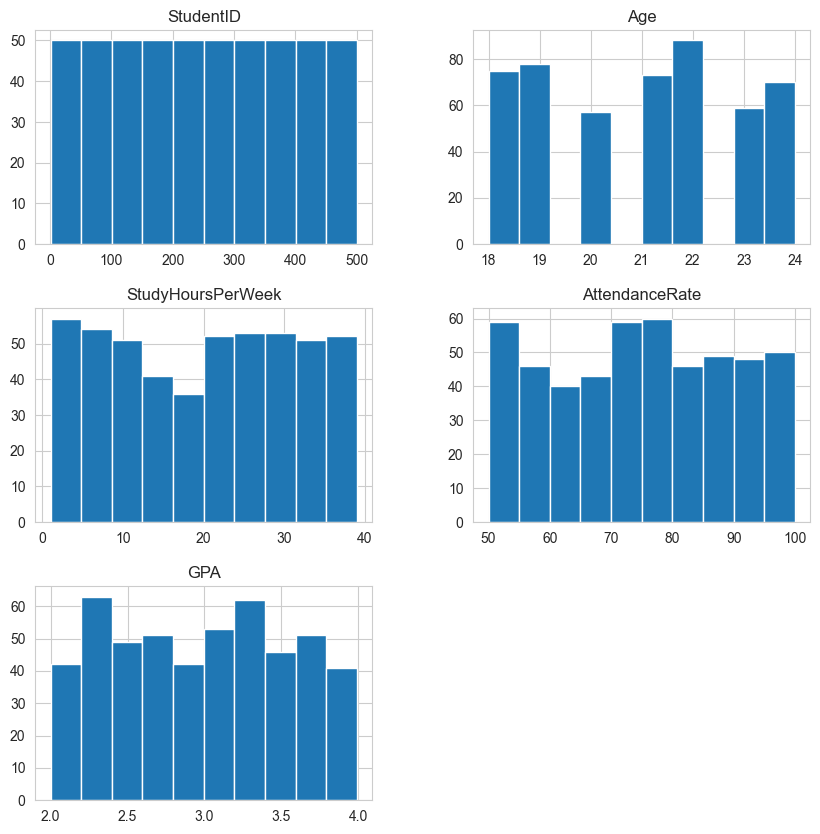

In [69]:
df.hist(figsize=(10, 10))

In [70]:
df.dtypes

StudentID                      int64
Gender                        object
Age                            int64
StudyHoursPerWeek              int64
AttendanceRate               float64
GPA                          float64
Major                         object
PartTimeJob                   object
ExtraCurricularActivities     object
dtype: object

In [71]:
major_count = df["Major"].value_counts()

In [72]:
major_count

Major
Business       114
Engineering    109
Arts           100
Education       97
Science         80
Name: count, dtype: int64

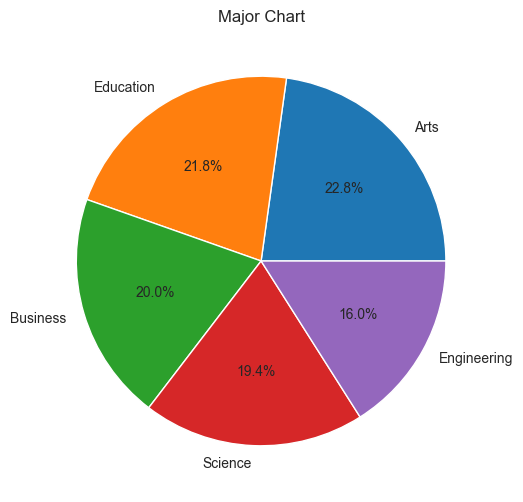

In [73]:
sb.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(major_count, labels=df['Major'].unique(), autopct='%1.1f%%')
plt.title('Major Chart')
plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
encoder = LabelEncoder()

In [76]:
df["Gender"] = encoder.fit_transform(df["Gender"])

In [77]:
df["Major"] = encoder.fit_transform(df["Major"])
df["PartTimeJob"] = encoder.fit_transform(df["PartTimeJob"])
df["ExtraCurricularActivities"] = encoder.fit_transform(df["ExtraCurricularActivities"])

In [79]:
df.describe()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.0000
mean,250.500000,0.488000,20.956000,19.876000,74.990380,2.98516,1.910000,0.536000,0.4800
std,144.481833,0.500357,2.000517,11.471347,14.565917,0.56362,1.371737,0.499202,0.5001
min,1.000000,0.000000,18.000000,1.000000,50.010000,2.00000,0.000000,0.000000,0.0000
25%,125.750000,0.000000,19.000000,10.000000,62.607500,2.48750,1.000000,0.000000,0.0000
50%,250.500000,0.000000,21.000000,20.500000,75.730000,3.00000,2.000000,1.000000,0.0000
75%,375.250000,1.000000,23.000000,30.000000,87.220000,3.48000,3.000000,1.000000,1.0000
max,500.000000,1.000000,24.000000,39.000000,99.970000,3.99000,4.000000,1.000000,1.0000


In [88]:
df = df.drop("StudentID", axis=1)

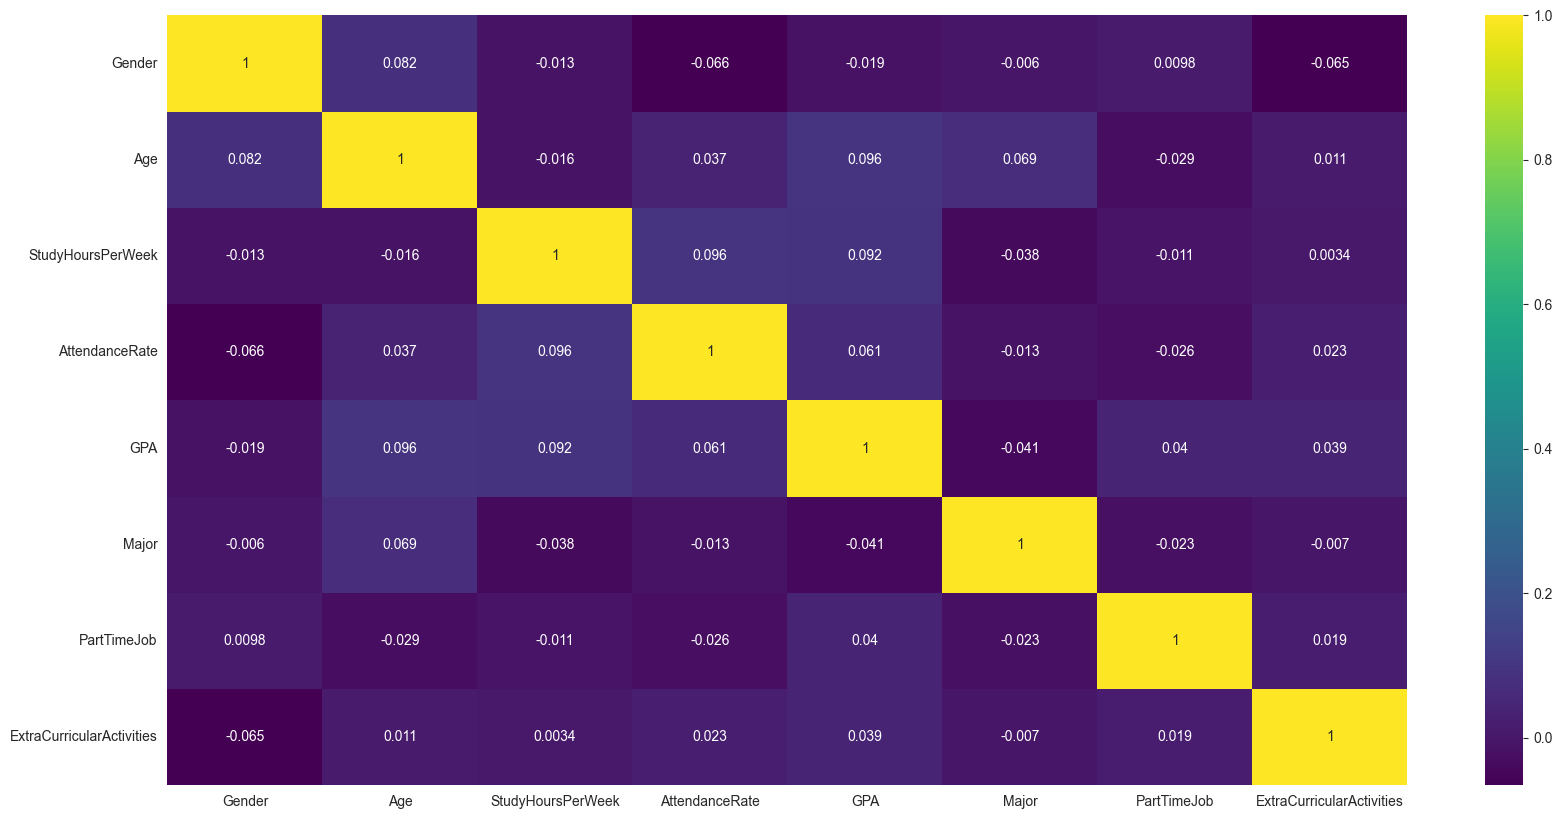

In [90]:
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [91]:
df.isna().sum()

Gender                       0
Age                          0
StudyHoursPerWeek            0
AttendanceRate               0
GPA                          0
Major                        0
PartTimeJob                  0
ExtraCurricularActivities    0
dtype: int64

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [95]:
X = df.drop("GPA", axis=1)
y = df["GPA"]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [97]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the regressor on the training data
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
# Predict on the test data
y_pred = reg.predict(X_test)
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.37051924920000007
